# week - 1

In [482]:
import numpy as np
from astropy.io import fits
from time import time
from time import perf_counter
import sys
import os
from timeit import timeit
import random
import matplotlib.pyplot as plt 

# WHAT ARE PULSARS

## ABOUT THE DATASET
The Dataset contains images of a part of the sky where the location of a pulsar is confirmed. The images are in the **fits** (Flexible Image Transport System) format. We will be using the **astropy** package to open and access these fits format images. The Data is collected from the Murchison Widefield Array (**MWA**) in Australia. The Dataset is already pre-processed and is centered to the faintest the quasar signal in said image. 

## MORE ABOUT THE MWA:
The Murchison Widefield Array (MWA) is a low-frequency radio telescope in Western Australia. The front-end of the MWA consists of 4,096 spider-like antennas arranged in 256 regular grids called ‘tiles’, spread over several kilometres within the Murchison Radio-astronomy Observatory (MRO).
The MWA’s particular attributes include:

- a very wide field of view (hundreds of square degrees)
- high angular resolution (several arcminutes)
- wide frequency range (70–300 MHz) with flexible tuning, and
![MWA](./MWA.png)

### LOAD DATA
**lets get a list of the files in the directory**

In [483]:
samples = sorted(os.listdir('/Users/jesherjoshua/Downloads/pulsars_fits_11/'))
files=sorted(os.listdir('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'))
print("No. of files in fits_11: ",len(samples))
print("No.of files in fits_7330: ",len(files))

No. of files in fits_11:  12
No.of files in fits_7330:  7330


In [484]:
type(fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/0000.fits')[0].data)

numpy.ndarray

In [534]:
dir(fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/0000.fits')[0])

['_EXCLUDE',
 '_MASK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axes',
 '_bitpix',
 '_blank',
 '_bscale',
 '_buffer',
 '_bzero',
 '_calculate_checksum',
 '_calculate_datasum',
 '_char_encode',
 '_checksum',
 '_checksum_valid',
 '_close',
 '_compute_checksum',
 '_compute_hdu_checksum',
 '_convert_pseudo_integer',
 '_data_loaded',
 '_data_needs_rescale',
 '_data_offset',
 '_data_replaced',
 '_data_size',
 '_datasum',
 '_datasum_valid',
 '_default_name',
 '_do_not_scale_image_data',
 '_dtype_for_bitpix',
 '_encode_byte',
 '_file',
 '_from_data',
 '_gcount',
 '_get_raw_data',
 '_get_scaled_image_data',
 '_get_timestamp',
 '_has_data',
 '_hdu_registry',
 '_header',

**hmm the data is in the form of a numpy array why is that ?**

# WHY NUMPY ?
**lets find out by performing a few basic arithmetic operations**

In [485]:
lis= random.sample(range(10**5),1000)
np_array=np.array(lis)
print(lis)

[17016, 53472, 26076, 3295, 78222, 77899, 99833, 58636, 69017, 95955, 46941, 11621, 67161, 12925, 56111, 14947, 29308, 66932, 15234, 42473, 93712, 17258, 79546, 97453, 22344, 78489, 15304, 39128, 3189, 42563, 87912, 76573, 43020, 12734, 78452, 49375, 82380, 22566, 82701, 84103, 3482, 891, 37156, 81269, 89428, 26650, 30393, 27866, 59950, 48879, 97014, 38160, 60970, 89484, 68480, 95308, 85027, 68668, 36242, 36571, 17470, 36139, 12174, 7502, 90623, 89858, 96338, 42052, 31103, 37938, 86175, 45898, 74433, 25198, 8261, 56263, 37833, 33990, 36412, 30040, 38320, 8589, 91046, 6090, 90110, 25369, 22875, 86248, 25234, 41442, 2848, 36673, 20934, 90544, 62001, 71847, 1898, 7140, 22202, 25477, 45535, 91113, 84807, 31084, 94092, 37870, 43551, 43916, 92835, 26192, 191, 80231, 35277, 18600, 87315, 9245, 57508, 97848, 84691, 65135, 23462, 40541, 43295, 39923, 77354, 68487, 1177, 10224, 80207, 48170, 37327, 80301, 23009, 24958, 59936, 25284, 4409, 82994, 37370, 10117, 3131, 57980, 88377, 32097, 23578, 17

## Numpy array vs List (Mean)

In [486]:
#list - operations


s = "sum(lis)/len(lis)"
timeit(s,setup ="import random; lis= random.sample(range(10**5),1000)",number=1000)

0.0029352919955272228

In [487]:
#using the mean function from the statistics module


s="mean(lis)"
timeit(s,setup ="import random; from statistics import mean; lis= random.sample(range(10**5),1000)",number=1000)


0.25804295799753163

In [488]:
#np


s="np.divide(np.sum(lis),len(lis))"
timeit(s,setup="import numpy as np; import random;lis= np.array(random.sample(range(10**5),1000))",number=1000)

0.005559416997130029

## Numpy array vs List (Median)

In [489]:
#list - operations

s = """n=len(lis)
mid=int(n/2)
list=sorted(lis)
if(n%2==0):
    median=(list[mid]+list[mid-1])/2
else:
    median=list[mid]"""

timeit(s,setup="import random;lis= random.sample(range(10**5),1000);",number=1000)

0.047723458003019914

In [490]:
#using the median method from the statistics module


s="median(lis)"

timeit(s,setup="import random;from statistics import median; lis= random.sample(range(10**5),1000);",number=1000)

0.04671062499983236

In [491]:
#np
s = """median=np.median(lis)"""
timeit(s,setup="import numpy as np; import random;lis= np.array(random.sample(range(10**5),1000))",number=1000)


0.008872666992829181

# DATA EXPLORATION

## Sample Set

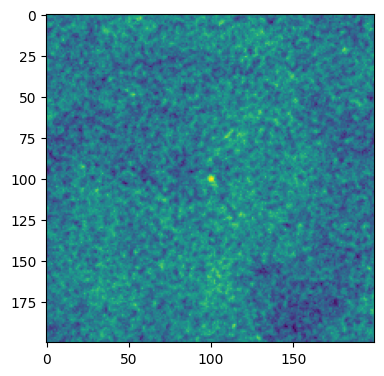

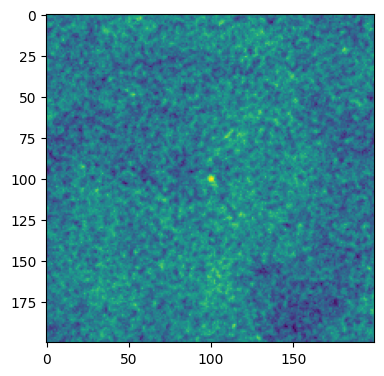

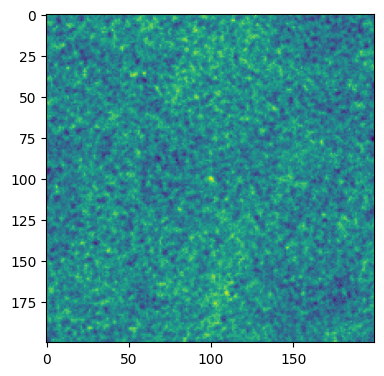

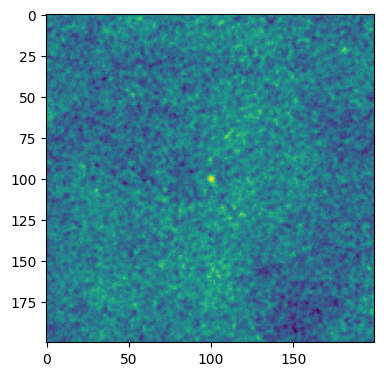

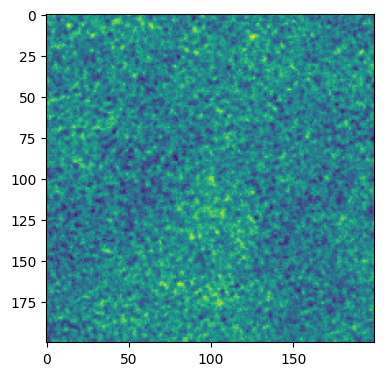

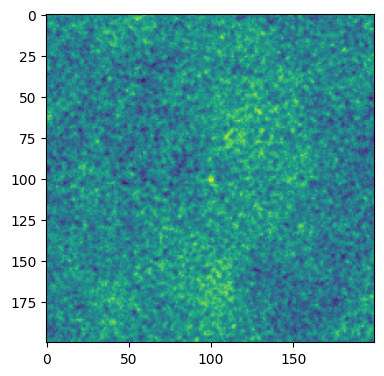

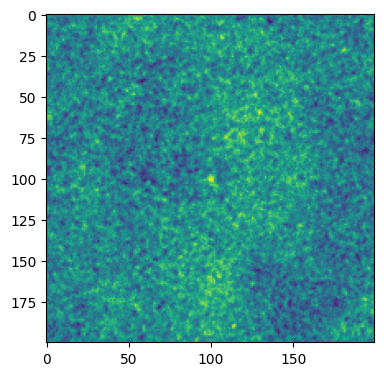

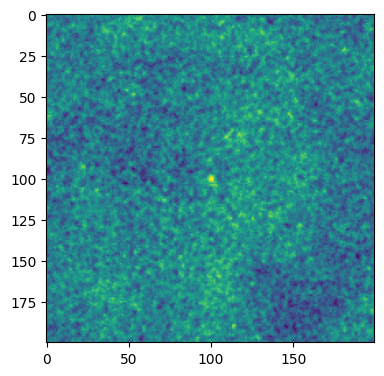

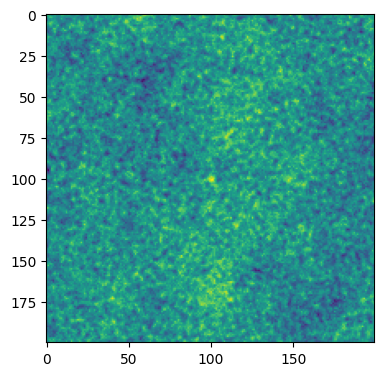

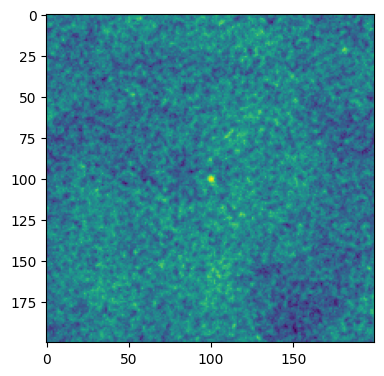

In [492]:

for i in range(10):
    fh=fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_11/'+samples[i])
    data = fh[0].data
    plt.figure(figsize=(50,50))
    plt.subplot(1,10,i+1)
    #plt.tight_layout()
    plt.imshow(data)
    #plt.title(files[i])

## Actual Dataset

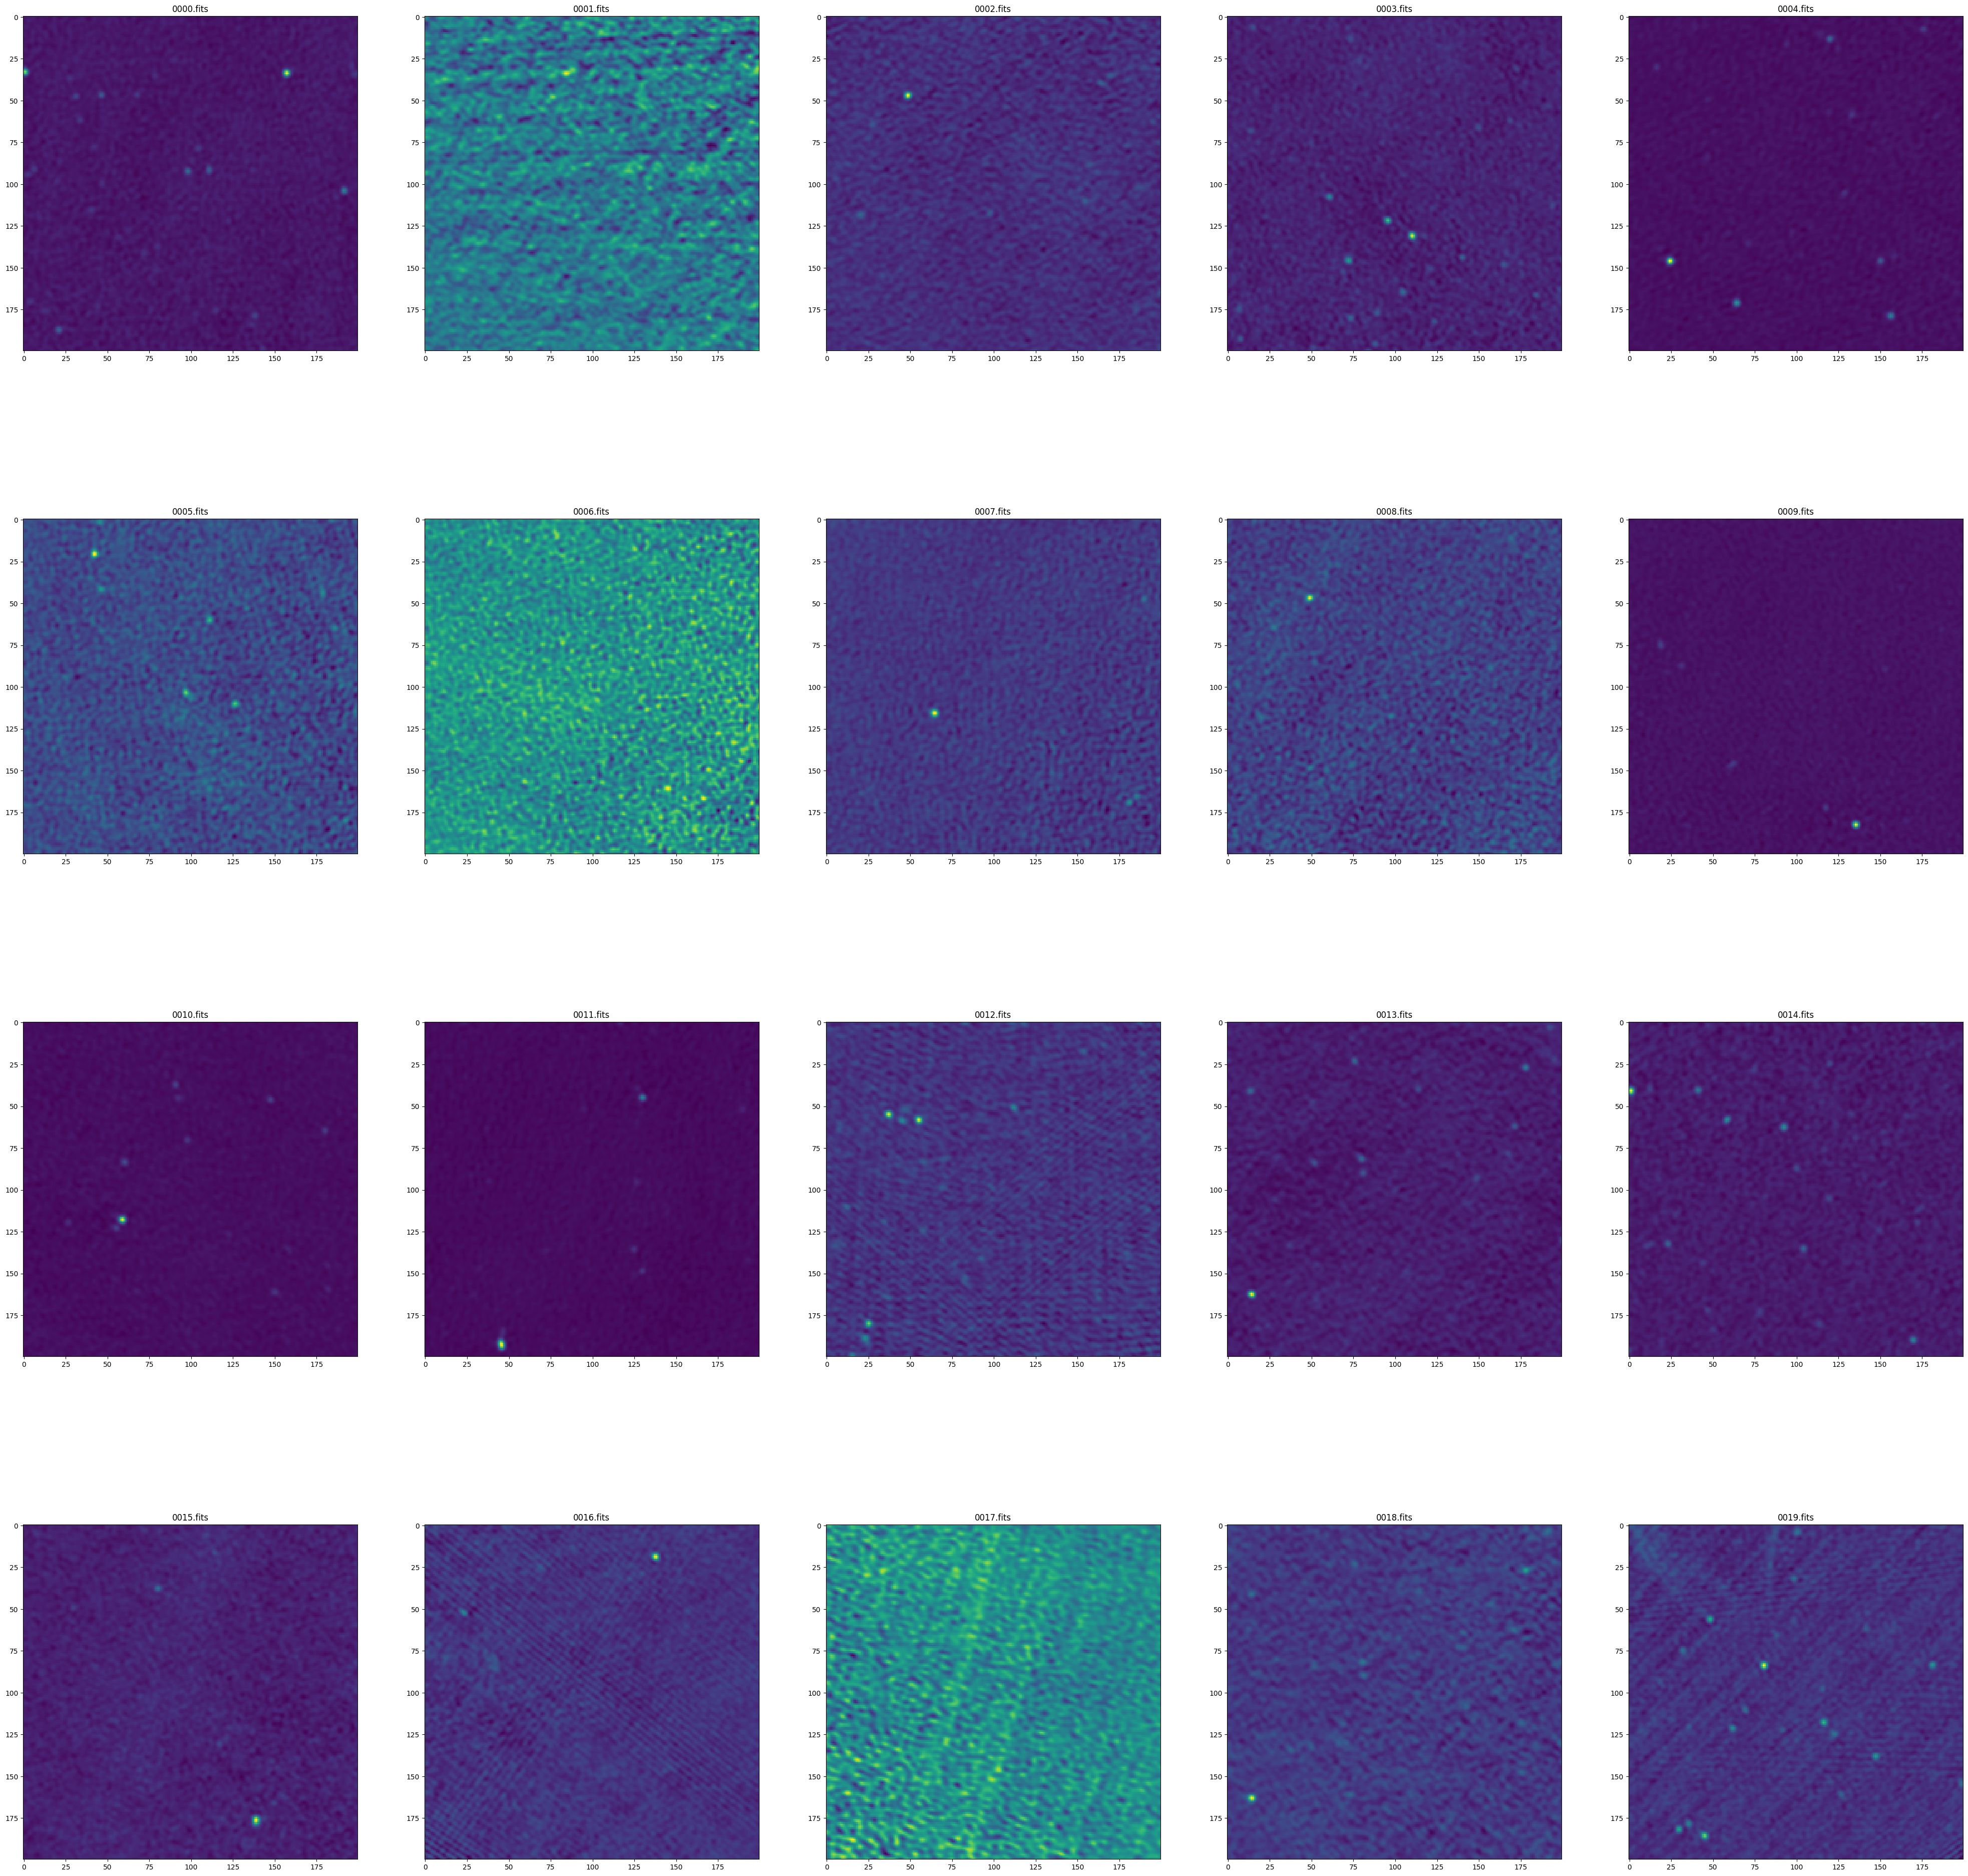

In [508]:
plt.figure(figsize=(50,50))
for i in range(20):
    fh=fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'+files[i+100])
    data = fh[0].data
    plt.subplot(4,5,i+1,)
    #plt.tight_layout()
    plt.imshow(data)
    plt.title(files[i])

# RECOGNIZING PULSARS

# MEAN STACKING TO DETECT UNDERLYING PULSARS

## Using Minimal Sample Set

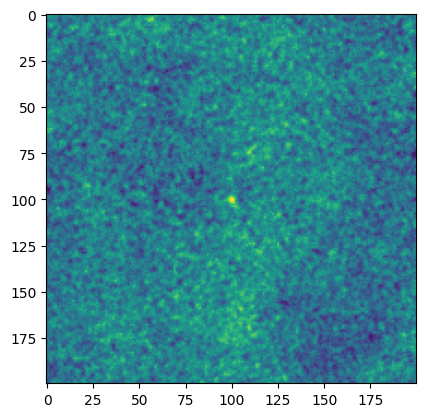

In [494]:
data=0
for i in range(len(samples)):
    data+=fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_11/'+samples[i])[0].data
avg=data/len(samples)
plt.imshow(avg)

## Using a Larger Dataset

Time taken:  7.055332899093628


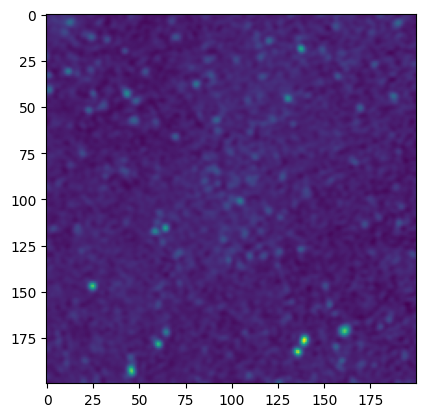

In [495]:
acc=0
start=time()
for i in range(len(files)):
    acc+=fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'+files[i])[0].data
mean=acc/len(files)
end=time()-start
print('Time taken: ',end)
plt.imshow(mean)

Time taken:  2.2570650577545166


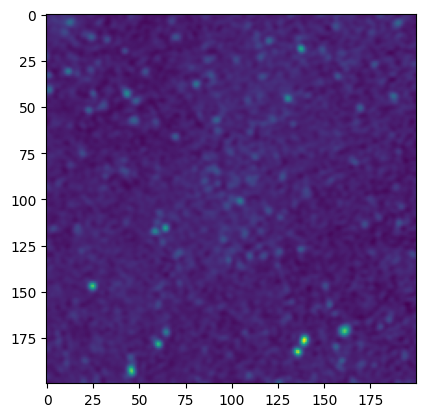

In [496]:
acc=0
start=time()
for i in range(len(files)):
    acc+=fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'+files[i])[0].data
mean=np.divide(acc,len(files))
end=time()-start
print('Time taken: ',end)
plt.imshow(mean)

# ANALYZING USING MEDIAN STACK

## Using all the data

Time taken:  8.191644191741943


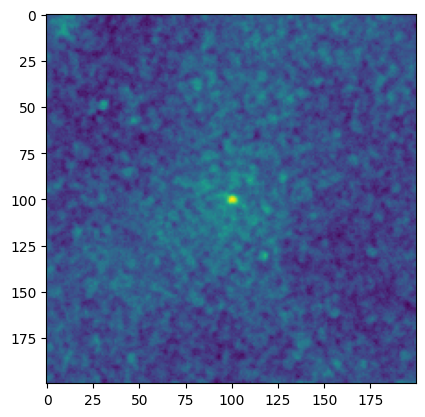

In [497]:
l=[]
start=time()
for i in range(len(files)):
    l.append(fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'+files[i])[0].data)
median_stack=np.dstack(l)
median=np.median(median_stack,axis=2)
end=time()-start
print('Time taken: ',end)
plt.imshow(median)

In [498]:
median_stack.ndim

3

## Using the Minimal Sample Set

Time taken:  0.0576329231262207


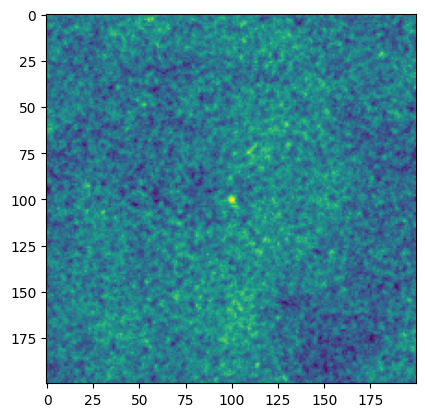

In [499]:
l=[]
start=time()
for i in range(len(samples)):
    l.append(fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_11/'+samples[i])[0].data)
median_stack=np.dstack(l)
median=np.median(median_stack,axis=2)
end=time()-start
print('Time taken: ',end)
plt.imshow(median)

# Why does the median perform better than the mean at this task ?

**let's see an example**

In [530]:
arr=np.array([1,2,3,4,5,10,25,1000])
print("Mean of the array: ",np.mean(arr))
print("Median of the array: ",np.median(arr))

Mean of the array:  131.25
Median of the array:  4.5


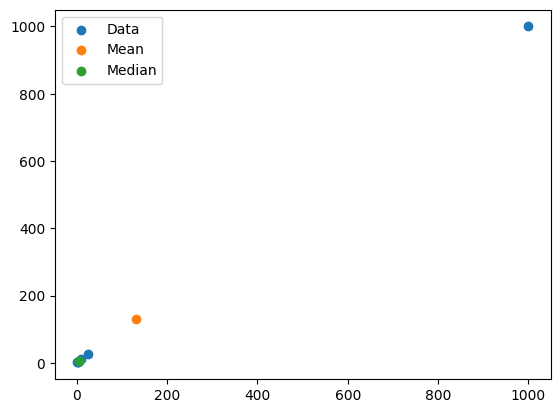

In [531]:
plt.scatter(arr,arr)
plt.scatter(np.mean(arr),np.mean(arr))
plt.scatter(np.median(arr),np.median(arr))
plt.legend(['Data','Mean','Median'])

We infer from the above experiment:
**The Median is more resistant to outliers rather than the Mean**